<a href="https://www.kaggle.com/code/oscarm524/ps-s3-ep2-eda-modeling?scriptVersionId=119290438" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="table"></a>
<h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table of Contents</h1>

[1. Notebook Versions](#Notebook-Versions)

[2. Loading Libraries](#Loading-Libraries)

[3. Reading Data Files](#Reading-Data-Files)

[4. Data Exploration](#Data-Exploration)

[5. Logistic Modeling](#Logistic-Modeling)

[6. SVM Modeling](#SVM-Modeling)

[7. Random Forest Modeling](#Random-Forest-Modeling)

[8. XGBoost Modeling](#XGBoost-Modeling)

[9. LightGBM Modeling](#LightGBM-Modeling)

[10. Ensemble Learning](#Ensemble-Learning)


<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Notebook Versions</h1>

1. Version 1 (01/10/2023)
    * EDA 
    
2. Version 2 (01/10/2023)
    * Logistic Modeling added
    
3. Version 3 (01/10/2023)
   * Random Forest Modeling added

4. Version 4 (01/11/2023)
   * XGBoost Modeling added
   * LightGBM Modeling added

5. Version 5 (01/13/2023)
   * Logistic regression model updated
   * SVM modeling added
   
6. Version 6 (01/13/2023)
   * Fixed typo in LightGBM modeling
   
7. Version 7 (01/13/2023)
   * Ensemble learning added
   
8. Version 8 (01/13/2023)
   * ROC-AUC curves added

9. Version 9 (01/15/2023)
   * Predicted likelihood distribution added
   * CatBoost Modeling added

10. Version 10 (02/15/2023)
   * Linking to GitHub
   
<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Loading Libraries</h1>    

In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt; plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Reading Data Files</h1> 

In [2]:
train = pd.read_csv('../input/playground-series-s3e2/train.csv')
test = pd.read_csv('../input/playground-series-s3e2/test.csv')
submission = pd.read_csv('../input/playground-series-s3e2/sample_submission.csv')

print('The dimession of the train dataset is:', train.shape)
print('The dimession of the test dataset is:', test.shape)

The dimession of the train dataset is: (15304, 12)
The dimession of the test dataset is: (10204, 11)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [4]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [5]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [6]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [7]:
test.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,10204.000000,10204.000000,10204.000000,10204.000000,10204.000000,10204.000000
mean,20405.500000,41.920713,0.051450,0.021756,89.197766,28.242351
std,2945.785407,21.097956,0.220925,0.145894,25.914364,6.733863
min,15304.000000,0.080000,0.000000,0.000000,55.120000,11.500000
25%,17854.750000,26.000000,0.000000,0.000000,75.060000,23.700000
50%,20405.500000,43.500000,0.000000,0.000000,85.070000,27.700000
75%,22956.250000,57.000000,0.000000,0.000000,96.750000,32.000000
max,25507.000000,82.000000,1.000000,1.000000,267.600000,97.600000


<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Data Exploration</h1> 

In [8]:
round(100*train['stroke'].value_counts() / train.shape[0], 2) 


0    95.87
1     4.13
Name: stroke, dtype: float64

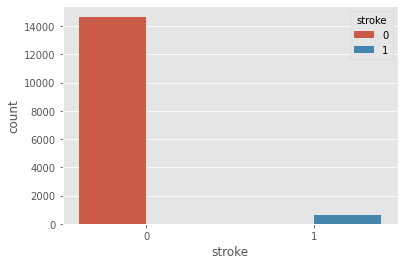

In [9]:
sns.countplot(x = 'stroke', hue = 'stroke', data = train);

> <div class="alert alert-block alert-info">
<b>Insight:</b> From the above chart, we see that the data is imbalanced (~96% are 0s and ~4% are 1s).</div>

First, we start exploring the relationship between numerical input features and the target variables.

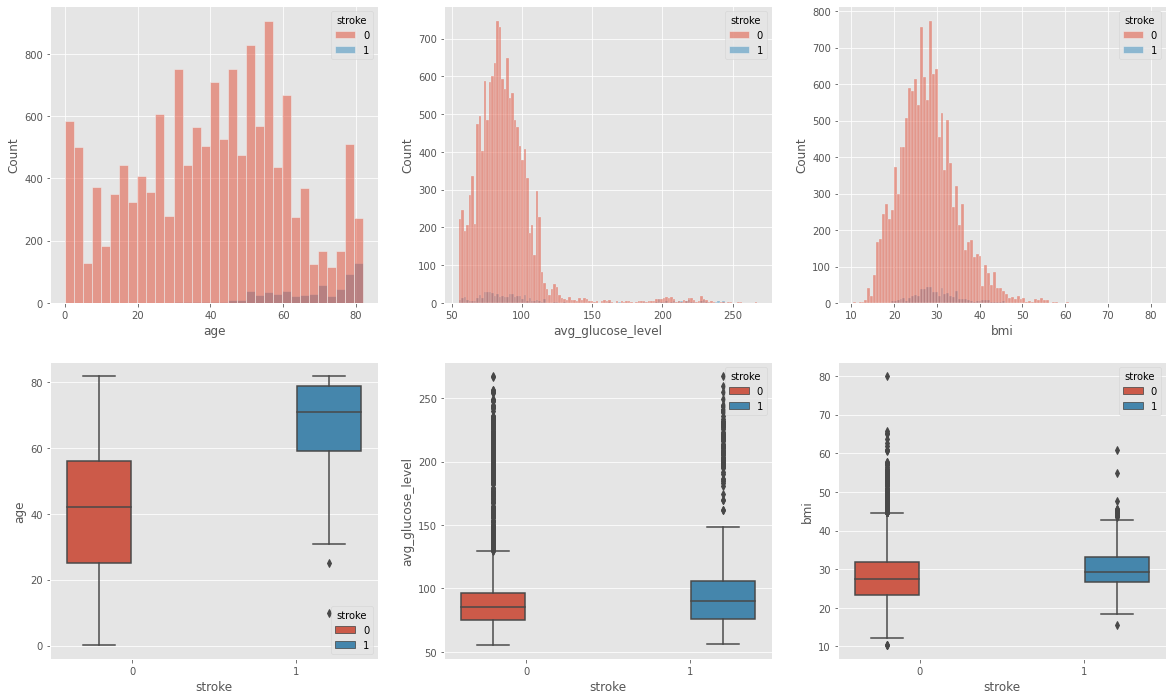

In [10]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))

sns.histplot(ax = axes[0, 0], x = 'age', hue = 'stroke', fill = True, data = train)
sns.histplot(ax = axes[0, 1], x = 'avg_glucose_level', hue = 'stroke', fill = True, data = train)
sns.histplot(ax = axes[0, 2], x = 'bmi', hue = 'stroke', fill = True, data = train)
sns.boxplot(ax = axes[1, 0], x = 'stroke', y = 'age', hue = 'stroke', data = train)
sns.boxplot(ax = axes[1, 1], x = 'stroke', y = 'avg_glucose_level', hue = 'stroke', data = train)
sns.boxplot(ax = axes[1, 2], x = 'stroke', y = 'bmi', hue = 'stroke', data = train);

> <div class="alert alert-block alert-info">
<b>Insight:</b> From the left panels (top and bottom), it is clear that the older patients are more likely to have a stroke. From the center and right panels (top and bottom), we see that there is a lot of overlapping in the avg_glucose_level and bmi distributions of patients with and without stroke, respectively.  </div>

Next, we explore the relationship between categorical input features and the target variables.

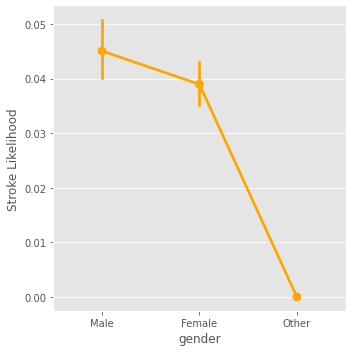

In [11]:
plot1 = sns.catplot(data = train, x = 'gender', y = 'stroke', kind = 'point', color = 'orange')
plot1.set_xlabels('gender', fontsize = 12) 
plot1.set_ylabels('Stroke Likelihood', fontsize = 12);

> <div class="alert alert-block alert-info">
<b>Insight:</b> From the above plot, we see that males are have a slight higher likelihood of having a stroke. Also note that there is one patient with gender labeled as Other.</div>

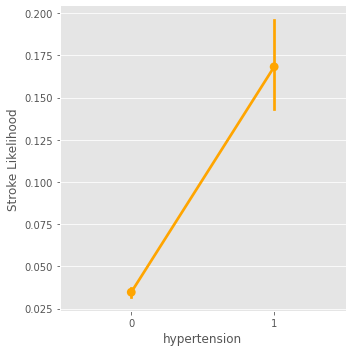

In [12]:
plot1 = sns.catplot(data = train, x = 'hypertension', y = 'stroke', kind = 'point', color = 'orange')
plot1.set_xlabels('hypertension', fontsize = 12) 
plot1.set_ylabels('Stroke Likelihood', fontsize = 12);

> <div class="alert alert-block alert-info">
<b>Insight:</b> From the above plot, it is clear that patients with hypertision have a much higher likelihood to have a stroke (about 4.85 times higher) </div>

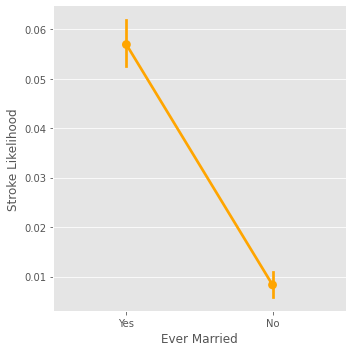

In [13]:
plot1 = sns.catplot(data = train, x = 'ever_married', y = 'stroke', kind = 'point', color = 'orange')
plot1.set_xlabels('Ever Married', fontsize = 12) 
plot1.set_ylabels('Stroke Likelihood', fontsize = 12);

> <div class="alert alert-block alert-info">
<b>Insight:</b> From the above plot, patients, who were married at some point in the live, have a higher likelihood to have a stroke (about 6.82 times higher) </div>

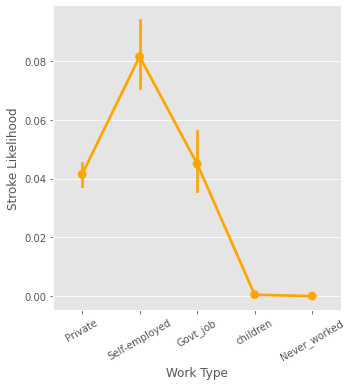

In [14]:
plot1 = sns.catplot(data = train, x = 'work_type', y = 'stroke', kind = 'point', color = 'orange')
plot1.set_xlabels('Work Type', fontsize = 12) 
plot1.set_ylabels('Stroke Likelihood', fontsize = 12)
plot1.set_xticklabels(rotation = 30); 

> <div class="alert alert-block alert-info">
<b>Insight:</b> From the above plot, we see that patitents who are self-employed have a higher likelihood of having stroke (probably due to stress?) </div>

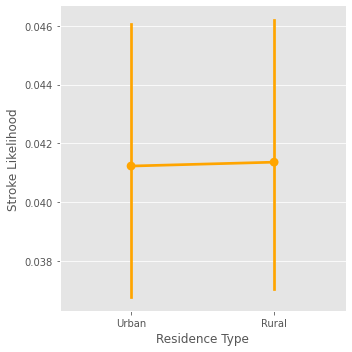

In [15]:
plot1 = sns.catplot(data = train, x = 'Residence_type', y = 'stroke', kind = 'point', color = 'orange')
plot1.set_xlabels('Residence Type', fontsize = 12) 
plot1.set_ylabels('Stroke Likelihood', fontsize = 12); 

> <div class="alert alert-block alert-info">
<b>Insight:</b> From the above plot, we see that residence type doesn't seem to have a relationship with stroke likelihood. </div>

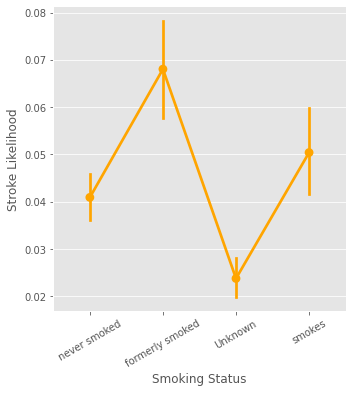

In [16]:
plot1 = sns.catplot(data = train, x = 'smoking_status', y = 'stroke', kind = 'point', color = 'orange')
plot1.set_xlabels('Smoking Status', fontsize = 12) 
plot1.set_ylabels('Stroke Likelihood', fontsize = 12)
plot1.set_xticklabels(rotation = 30); 

> <div class="alert alert-block alert-info">
<b>Insight:</b> From the above plot, we see that patients, who formely smoked, have a higher likelihood of having a stroke. </div>

Next, we explore potential relationship between two input features and the target variable.

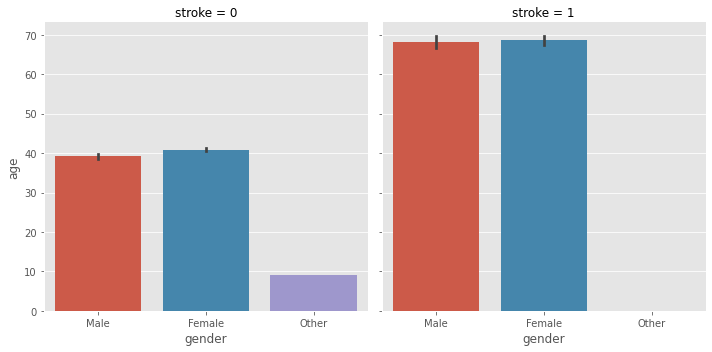

In [17]:
sns.catplot(data = train, x = 'gender', y = 'age', col = 'stroke', kind = 'bar');

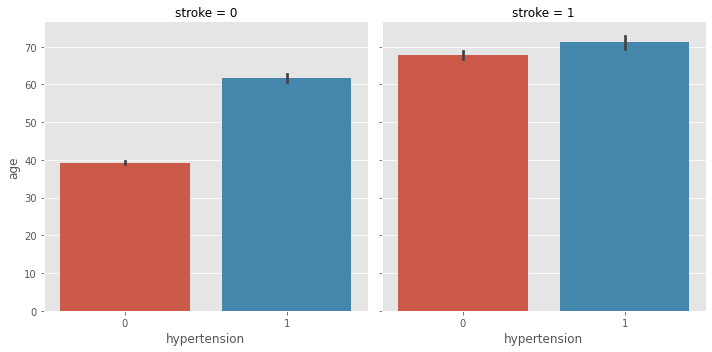

In [18]:
sns.catplot(data = train, x = 'hypertension', y = 'age', col = 'stroke', kind = 'bar');

> <div class="alert alert-block alert-info">
<b>Insight:</b> From the above plots, we see that age and hypertsion have a relationship with stroke; that is, the older the patient is (with hypertension), the more likelily of having a stroke.</div>

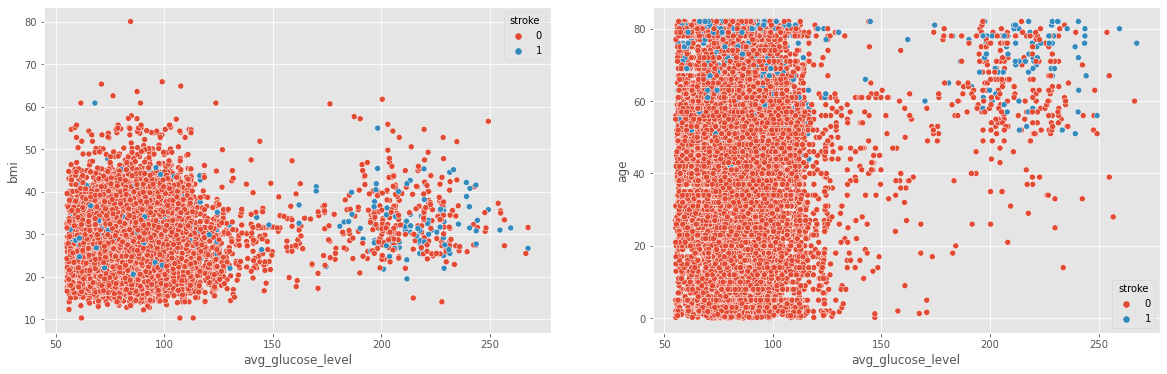

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (20, 6))

sns.scatterplot(ax = axes[0], x = 'avg_glucose_level', y = 'bmi', data = train, hue = 'stroke')
sns.scatterplot(ax = axes[1], x = 'avg_glucose_level', y = 'age', data = train, hue = 'stroke');

> <div class="alert alert-block alert-info">
<b>Insight:</b> From the above plot, there is no a clear relationship among the numerical input features. However, in both plots we see that when avg_glucose_level is greater than 150 there are more patients who had a stroke.</div>

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Logistic Modeling</h1> 

In [20]:
train_logit = train.copy()
test_logit = test.copy()

## Defining scaler
scaler = MinMaxScaler()

## Defining inputs and target
train_dummies = pd.get_dummies(train_logit[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
train_dummies = train_dummies.drop(columns = ['gender_Other', 'ever_married_No', 'work_type_children', 'Residence_type_Urban', 'smoking_status_Unknown'])

X = train_logit.drop(columns = ['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'], axis = 1)
X = pd.concat([X, train_dummies], axis = 1)
Y = train_logit['stroke']

test_dummies = pd.get_dummies(test_logit[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
test_dummies = test_dummies.drop(columns = ['gender_Other', 'ever_married_No', 'work_type_children', 'Residence_type_Urban', 'smoking_status_Unknown'])

test_logit = test_logit.drop(columns = ['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1)
test_logit = pd.concat([test_logit, test_dummies], axis = 1)
test_logit = pd.DataFrame(scaler.fit_transform(test_logit), columns = test_logit.columns)

cv_scores, roc_auc_scores = list(), list()
preds = list()

## Running 5 times CV
for i in range(5):
    
    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(X, Y):
        
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
        
        ## Scaling the data
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
        X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X.columns)
        
        ## Building logistic model
        logit_md = LogisticRegression(C = 0.2, penalty = 'l1', solver = 'saga', max_iter = 1000).fit(X_train, Y_train)
        
        ## Predicting on X_test and test
        logit_pred_1 = logit_md.predict_proba(X_test)[:, 1]
        logit_pred_2 = logit_md.predict_proba(test_logit)[:, 1]
        
        ## Computing roc-auc score
        roc_auc_scores.append(roc_auc_score(Y_test, logit_pred_1))
        preds.append(logit_pred_2)
        
    cv_scores.append(np.mean(roc_auc_scores))

logit_cv_score = np.mean(cv_scores)    
print('The roc-auc score over 5-folds (run 5 times) is:', logit_cv_score)

The roc-auc score over 5-folds (run 5 times) is: 0.8834253432676284


In [21]:
## Building model in the entire train dataset
logit_md = LogisticRegression(C = 0.2, penalty = 'l1', solver = 'saga', max_iter = 10000).fit(X, Y)

train_preds = pd.DataFrame({'stroke': Y, 'stroke_pred': logit_md.predict_proba(X)[:, 1]})
train_preds.head()

,stroke,stroke_pred
0,0,0.004353
1,0,0.007500
2,0,0.013771
3,0,0.034708
4,0,0.003920


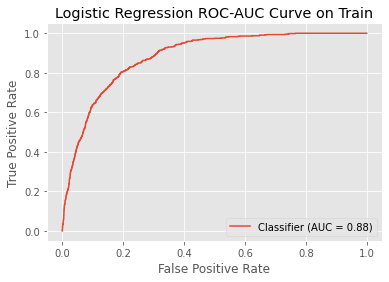

In [22]:
RocCurveDisplay.from_predictions(train_preds['stroke'], train_preds['stroke_pred'])
plt.title('Logistic Regression ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

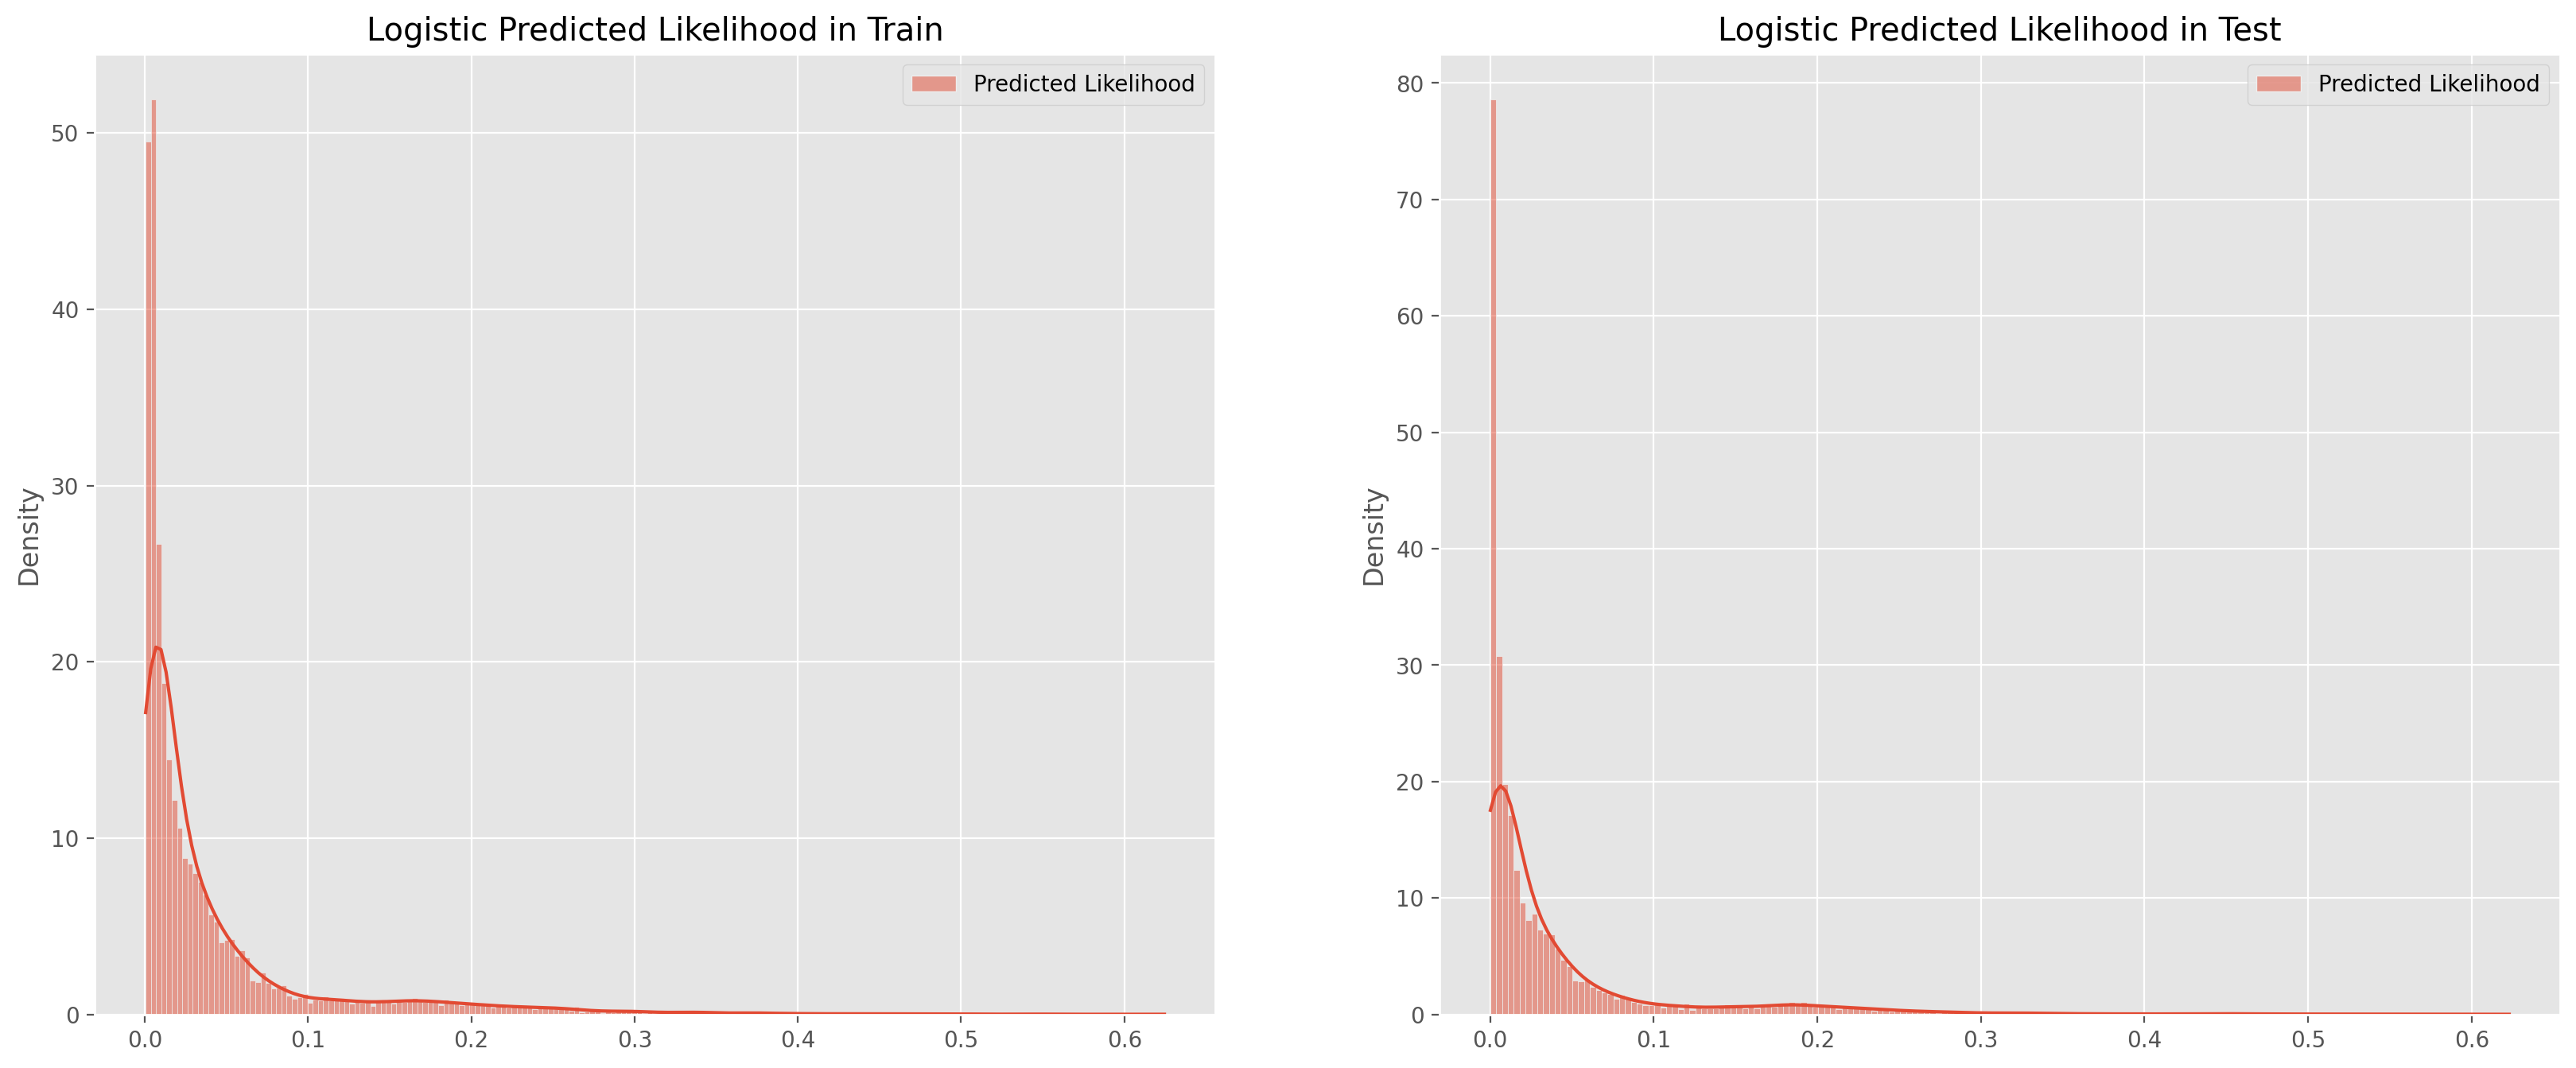

In [23]:
logit_preds_train = train_preds['stroke_pred']
logit_preds_test = pd.DataFrame(preds).apply(np.mean, axis = 0)

data1 = pd.DataFrame({'Predicted Likelihood': logit_preds_train})
data2 = pd.DataFrame({'Predicted Likelihood': logit_preds_test})

fig, axes = plt.subplots(1, 2, figsize = (20, 8), dpi = 200)
sns.histplot(data = data1, kde = True, stat = 'density', ax = axes[0]).set(title = 'Logistic Predicted Likelihood in Train')
sns.histplot(data = data2, kde = True, stat = 'density', ax = axes[1]).set(title = 'Logistic Predicted Likelihood in Test')
plt.show();

In [24]:
submission['stroke'] = logit_preds_test
submission.to_csv('logistic_submission.csv', index = False)

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">SVM Modeling</h1> 

In [25]:
cv_scores, roc_auc_scores = list(), list()
preds = list()

## Running 5 times CV
for i in range(5):
    
    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(X, Y):
        
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
        
        ## Scaling the data
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
        X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X.columns)
        
        ## Building logistic model
        svm_md = SVC(C = 100, gamma = 1, kernel = 'rbf', probability = True).fit(X_train, Y_train)
        
        ## Predicting on X_test and test
        svm_pred_1 = svm_md.predict_proba(X_test)[:, 1]
        svm_pred_2 = svm_md.predict_proba(test_logit)[:, 1]
        
        ## Computing roc-auc score
        roc_auc_scores.append(roc_auc_score(Y_test, svm_pred_1))
        preds.append(svm_pred_2)
        
    cv_scores.append(np.mean(roc_auc_scores))

svm_cv_score = np.mean(cv_scores)    
print('The roc-auc score over 5-folds (run 5 times) is:', svm_cv_score)

The roc-auc score over 5-folds (run 5 times) is: 0.6958068838782032


In [26]:
## Building model in the entire train dataset
X_trans = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
svm_md = SVC(C = 100, gamma = 1, kernel = 'rbf', probability = True).fit(X_trans, Y)

train_preds = pd.DataFrame({'stroke': Y, 'stroke_pred': svm_md.predict_proba(X_trans)[:, 1]})
train_preds.head()

,stroke,stroke_pred
0,0,0.047476
1,0,0.052844
2,0,0.051585
3,0,0.052838
4,0,0.022230


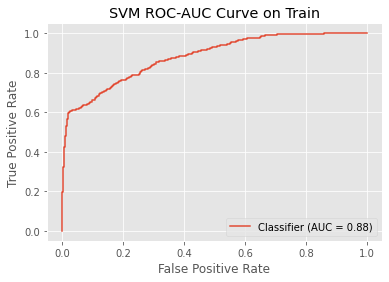

In [27]:
RocCurveDisplay.from_predictions(train_preds['stroke'], train_preds['stroke_pred'])
plt.title('SVM ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

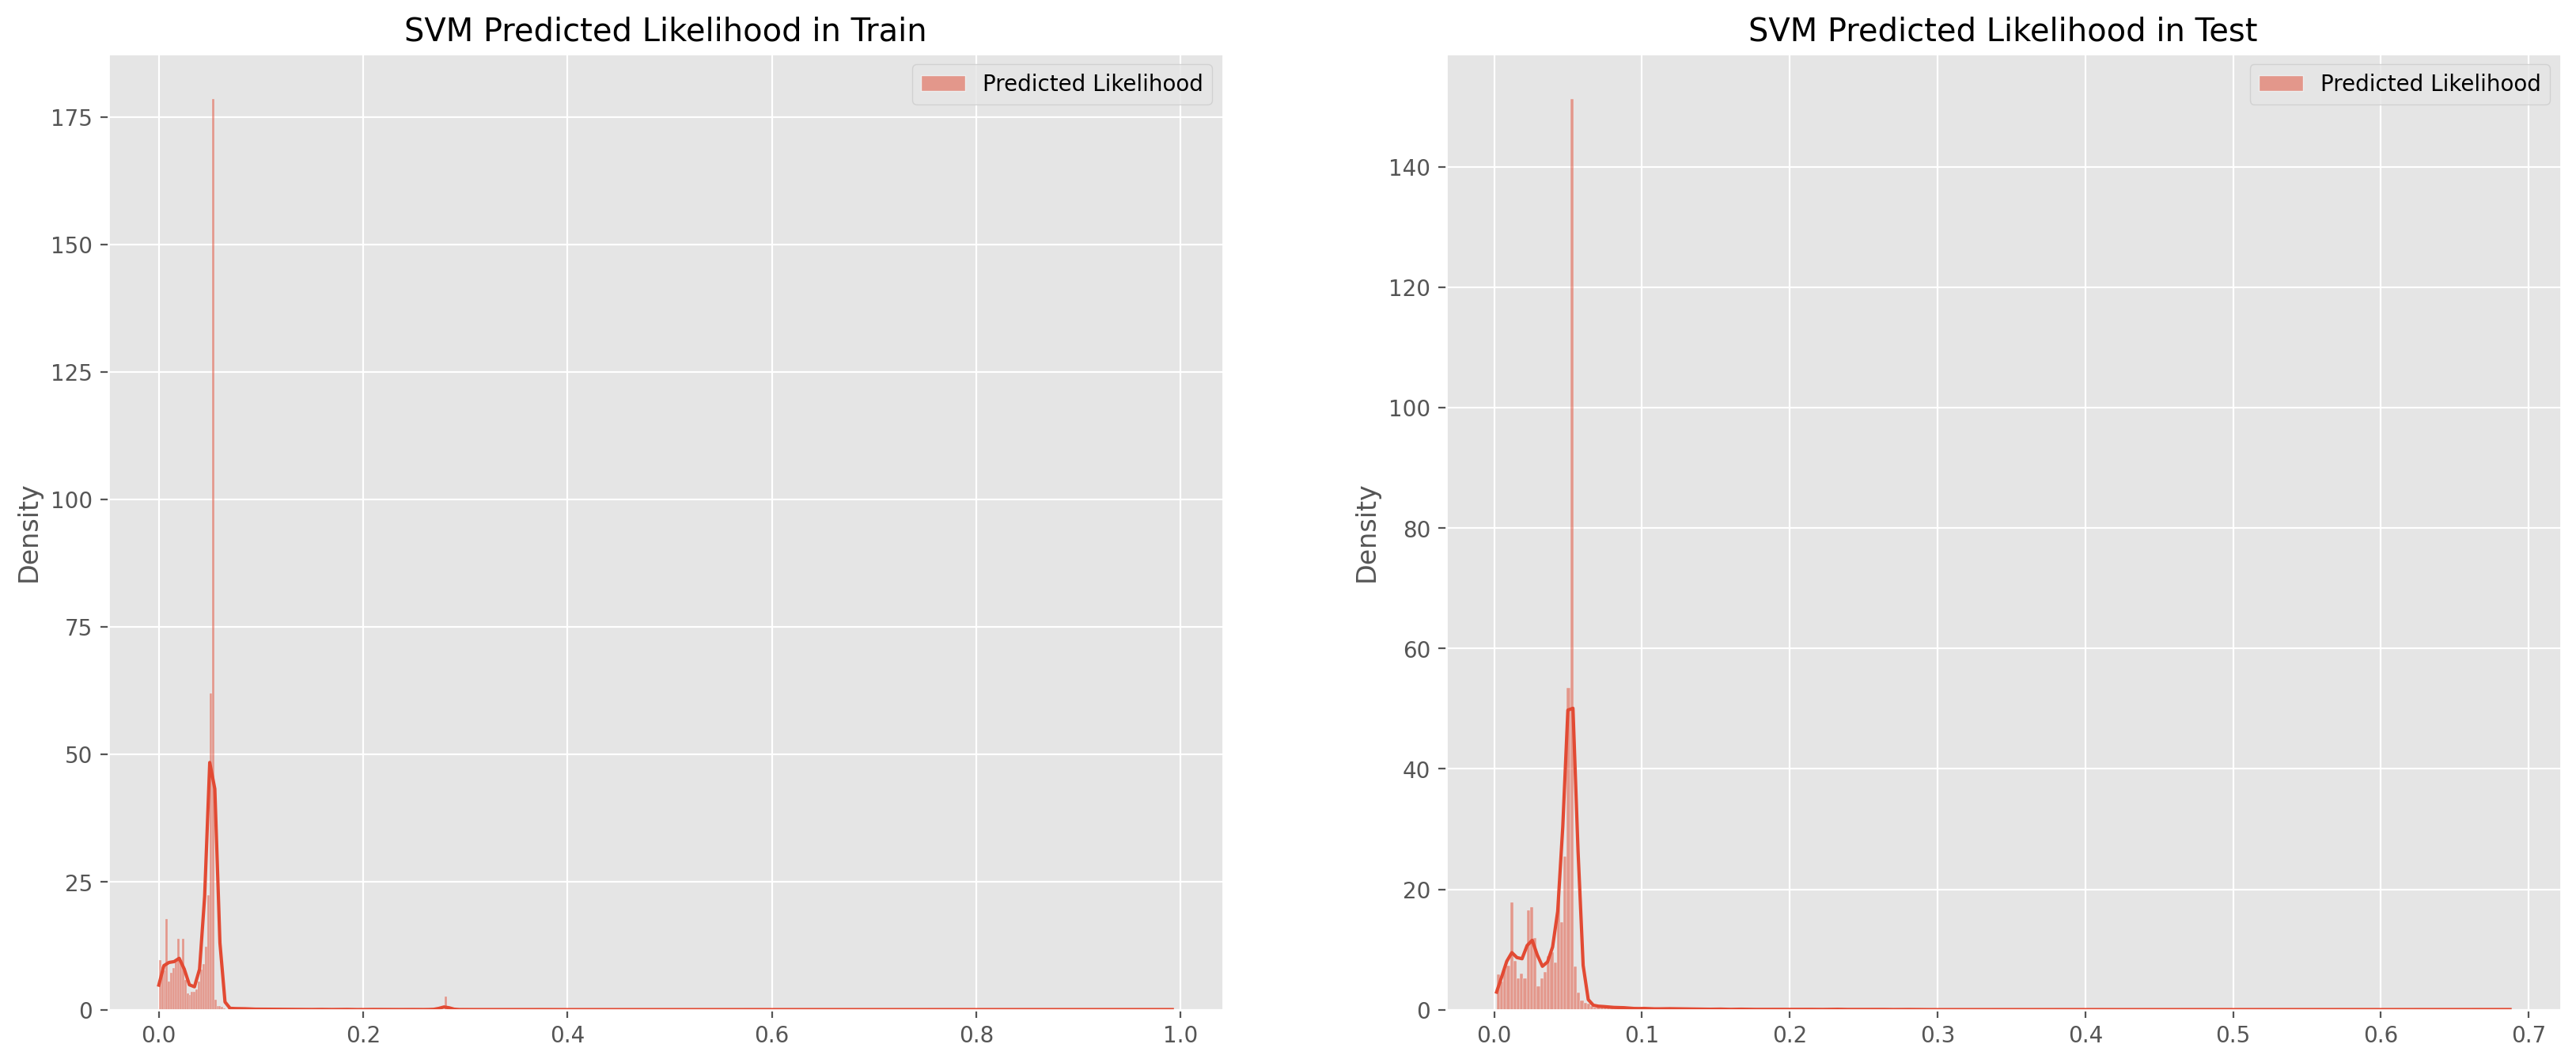

In [28]:
svm_preds_train = train_preds['stroke_pred']
svm_preds_test = pd.DataFrame(preds).apply(np.mean, axis = 0)

data1 = pd.DataFrame({'Predicted Likelihood': svm_preds_train})
data2 = pd.DataFrame({'Predicted Likelihood': svm_preds_test})

fig, axes = plt.subplots(1, 2, figsize = (20, 8), dpi = 200)
sns.histplot(data = data1, kde = True, stat = 'density', ax = axes[0]).set(title = 'SVM Predicted Likelihood in Train')
sns.histplot(data = data2, kde = True, stat = 'density', ax = axes[1]).set(title = 'SVM Predicted Likelihood in Test')
plt.show();

In [29]:
submission['stroke'] = svm_preds_test
submission.to_csv('svm_submission.csv', index = False)

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Random Forest Modeling</h1> 

In [30]:
train_RF = train.copy()
test_RF = test.copy()

## Defining inputs and target
train_dummies = pd.get_dummies(train_RF[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
train_dummies = train_dummies.drop(columns = ['gender_Other', 'ever_married_No', 'work_type_children', 'Residence_type_Urban', 'smoking_status_Unknown'])

X = train_RF.drop(columns = ['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'], axis = 1)
X = pd.concat([X, train_dummies], axis = 1)
Y = train_RF['stroke']

test_dummies = pd.get_dummies(test_RF[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
test_dummies = test_dummies.drop(columns = ['gender_Other', 'ever_married_No', 'work_type_children', 'Residence_type_Urban', 'smoking_status_Unknown'])

test_RF = test_RF.drop(columns = ['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1)
test_RF = pd.concat([test_RF, test_dummies], axis = 1)

cv_scores, roc_auc_scores = list(), list()
preds = list()

## Running 5 times CV
for i in range(5):
    
    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(X, Y):
        
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
    
        ## Building RF model
        RF_md = RandomForestClassifier(max_depth = 7, min_samples_leaf = 5, min_samples_split = 2, n_estimators = 300).fit(X_train, Y_train)
        
        ## Predicting on X_test and test
        RF_pred_1 = RF_md.predict_proba(X_test)[:, 1]
        RF_pred_2 = RF_md.predict_proba(test_RF)[:, 1]
        
        ## Computing roc-auc score
        roc_auc_scores.append(roc_auc_score(Y_test, RF_pred_1))
        preds.append(RF_pred_2)
        
    cv_scores.append(np.mean(roc_auc_scores))

RF_cv_score = np.mean(cv_scores)    
print('The roc-auc score over 5-folds (run 5 times) is:', RF_cv_score)

The roc-auc score over 5-folds (run 5 times) is: 0.885275670178628


In [31]:
## Building model in the entire train dataset
RF_md = RandomForestClassifier(max_depth = 7, min_samples_leaf = 5, min_samples_split = 2, n_estimators = 300).fit(X, Y)

train_preds = pd.DataFrame({'stroke': Y, 'stroke_pred': RF_md.predict_proba(X)[:, 1]})
train_preds.head()

,stroke,stroke_pred
0,0,0.015151
1,0,0.016073
2,0,0.017106
3,0,0.032918
4,0,0.005379


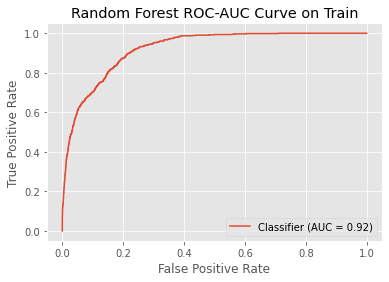

In [32]:
RocCurveDisplay.from_predictions(train_preds['stroke'], train_preds['stroke_pred'])
plt.title('Random Forest ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

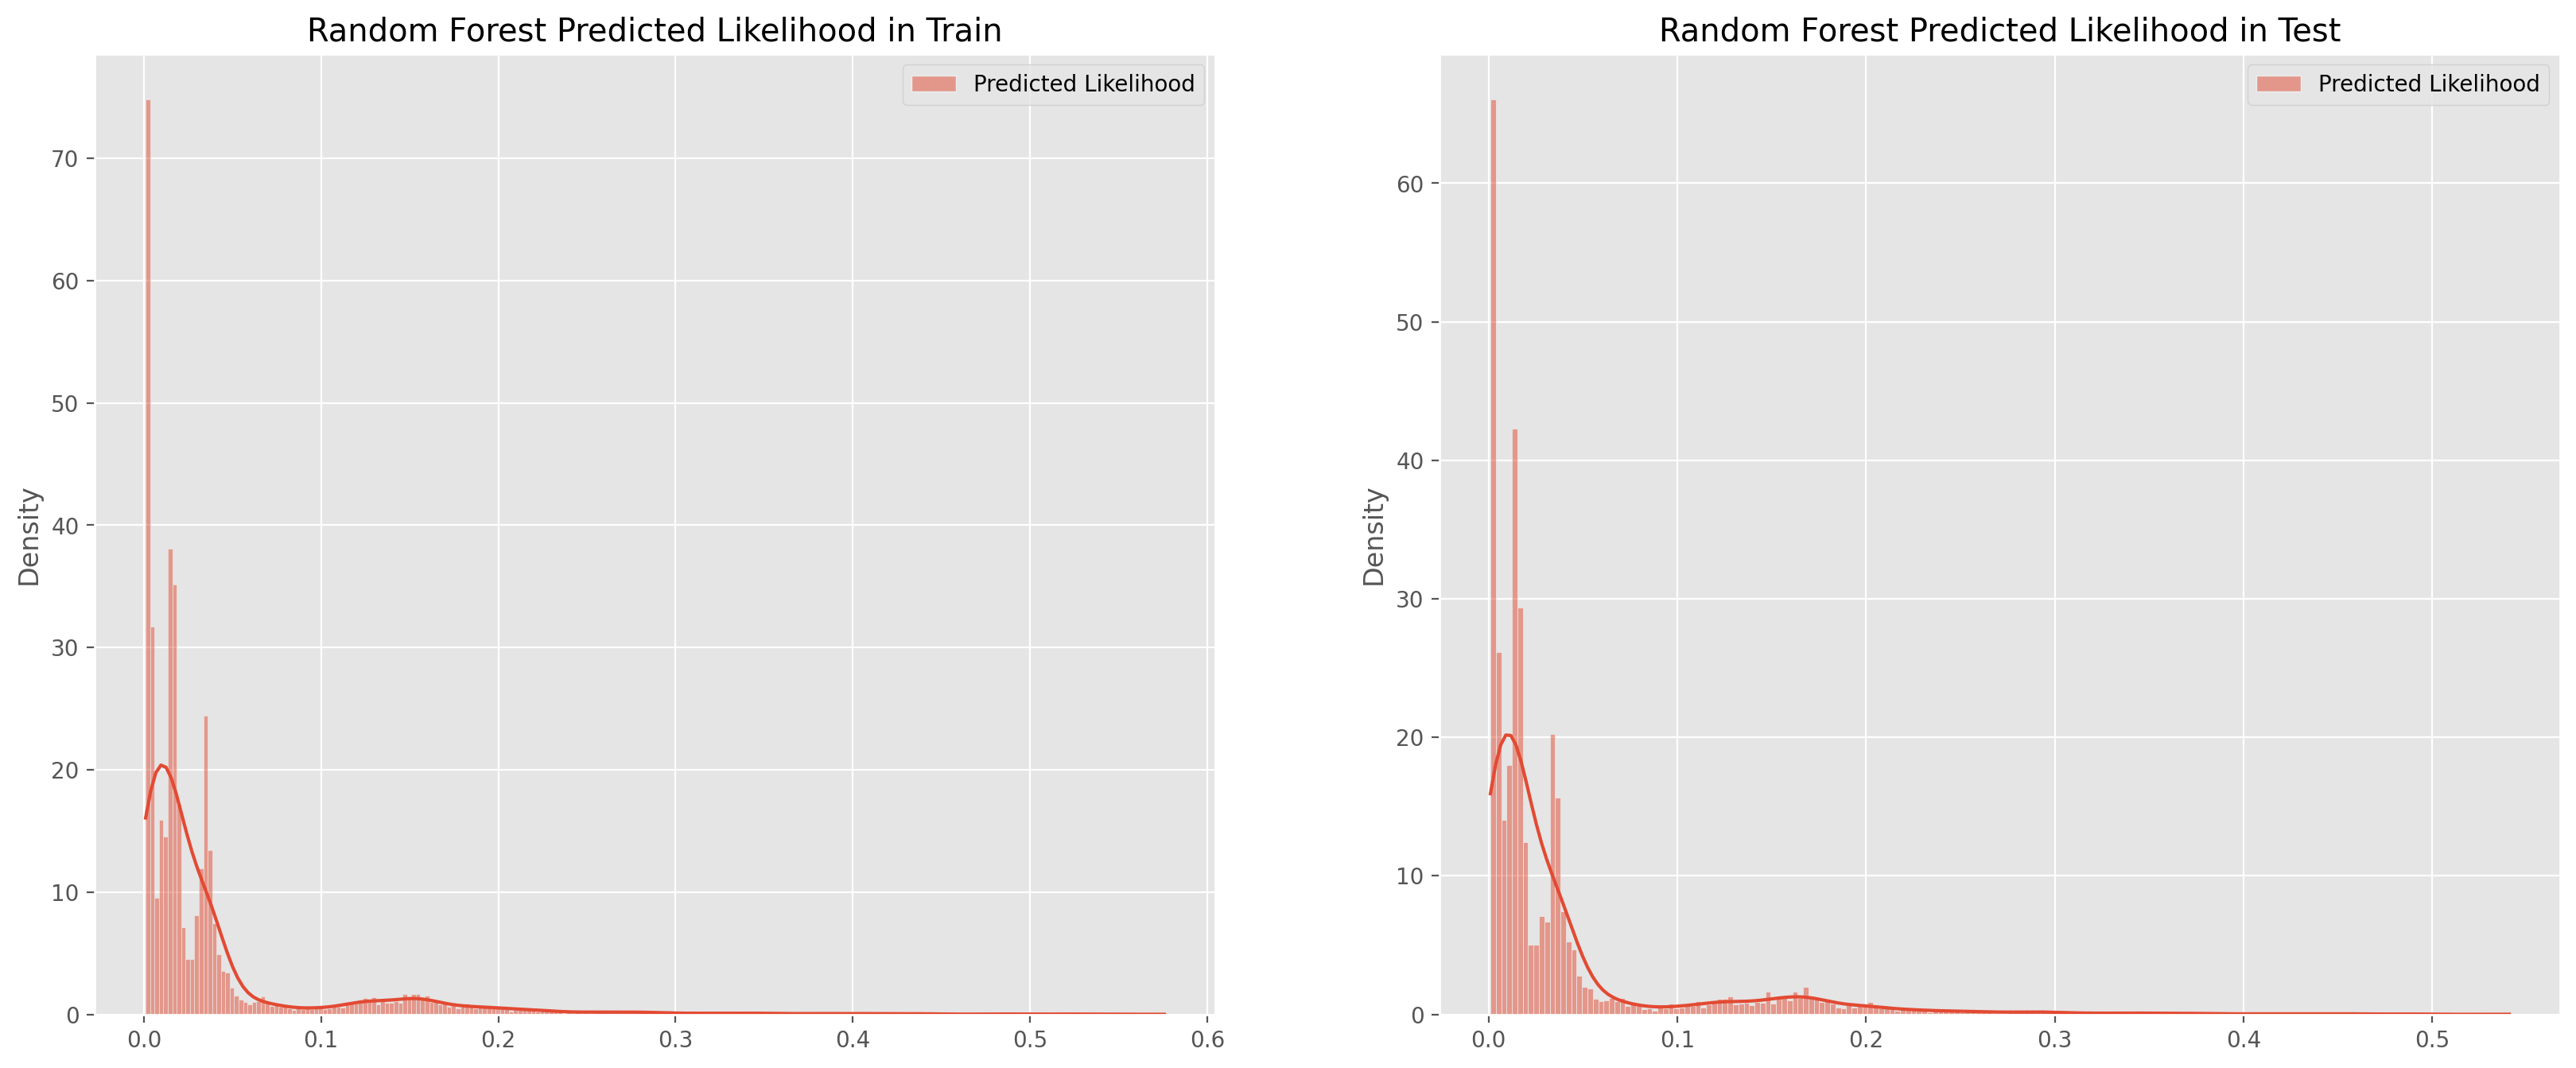

In [33]:
RF_preds_train = train_preds['stroke_pred']
RF_preds_test = pd.DataFrame(preds).apply(np.mean, axis = 0)

data1 = pd.DataFrame({'Predicted Likelihood': RF_preds_train})
data2 = pd.DataFrame({'Predicted Likelihood': RF_preds_test})

fig, axes = plt.subplots(1, 2, figsize = (20, 8), dpi = 200)
sns.histplot(data = data1, kde = True, stat = 'density', ax = axes[0]).set(title = 'Random Forest Predicted Likelihood in Train')
sns.histplot(data = data2, kde = True, stat = 'density', ax = axes[1]).set(title = 'Random Forest Predicted Likelihood in Test')
plt.show();

In [34]:
submission['stroke'] = RF_preds_test
submission.to_csv('RF_submission.csv', index = False)

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">XGBoost Modeling</h1> 

In [35]:
train_XGB = train.copy()
test_XGB = test.copy()

## Defining inputs and target
train_dummies = pd.get_dummies(train_XGB[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
train_dummies = train_dummies.drop(columns = ['gender_Other', 'ever_married_No', 'work_type_children', 'Residence_type_Urban', 'smoking_status_Unknown'])

X = train_XGB.drop(columns = ['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'], axis = 1)
X = pd.concat([X, train_dummies], axis = 1)
Y = train_XGB['stroke']

test_dummies = pd.get_dummies(test_XGB[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
test_dummies = test_dummies.drop(columns = ['gender_Other', 'ever_married_No', 'work_type_children', 'Residence_type_Urban', 'smoking_status_Unknown'])

test_XGB = test_XGB.drop(columns = ['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1)
test_XGB = pd.concat([test_XGB, test_dummies], axis = 1)

cv_scores, roc_auc_scores = list(), list()
preds = list()

## Running 5 times CV
for i in range(5):
    
    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(X, Y):
        
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
    
        ## Building RF model
        XGB_md = XGBClassifier(colsample_bytree = 0.8, 
                               gamma = 0.3, 
                               learning_rate = 0.01, 
                               max_depth = 5, 
                               min_child_weight = 10, 
                               n_estimators = 500, 
                               subsample = 0.8).fit(X_train, Y_train)
        
        ## Predicting on X_test and test
        XGB_pred_1 = XGB_md.predict_proba(X_test)[:, 1]
        XGB_pred_2 = XGB_md.predict_proba(test_XGB)[:, 1]
        
        ## Computing roc-auc score
        roc_auc_scores.append(roc_auc_score(Y_test, XGB_pred_1))
        preds.append(XGB_pred_2)
        
    cv_scores.append(np.mean(roc_auc_scores))

XGB_cv_score = np.mean(cv_scores)    
print('The roc-auc score over 5-folds (run 5 times) is:', XGB_cv_score)

The roc-auc score over 5-folds (run 5 times) is: 0.8853855128396434


In [36]:
## Building model in the entire train dataset
XGB_md = XGBClassifier(colsample_bytree = 0.8, 
                       gamma = 0.3, 
                       learning_rate = 0.01, 
                       max_depth = 5, 
                       min_child_weight = 10, 
                       n_estimators = 500, 
                       subsample = 0.8).fit(X, Y)

train_preds = pd.DataFrame({'stroke': Y, 'stroke_pred': XGB_md.predict_proba(X)[:, 1]})
train_preds.head()

,stroke,stroke_pred
0,0,0.007921
1,0,0.009511
2,0,0.014932
3,0,0.030256
4,0,0.006667


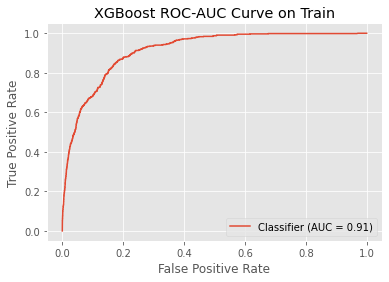

In [37]:
RocCurveDisplay.from_predictions(train_preds['stroke'], train_preds['stroke_pred'])
plt.title('XGBoost ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

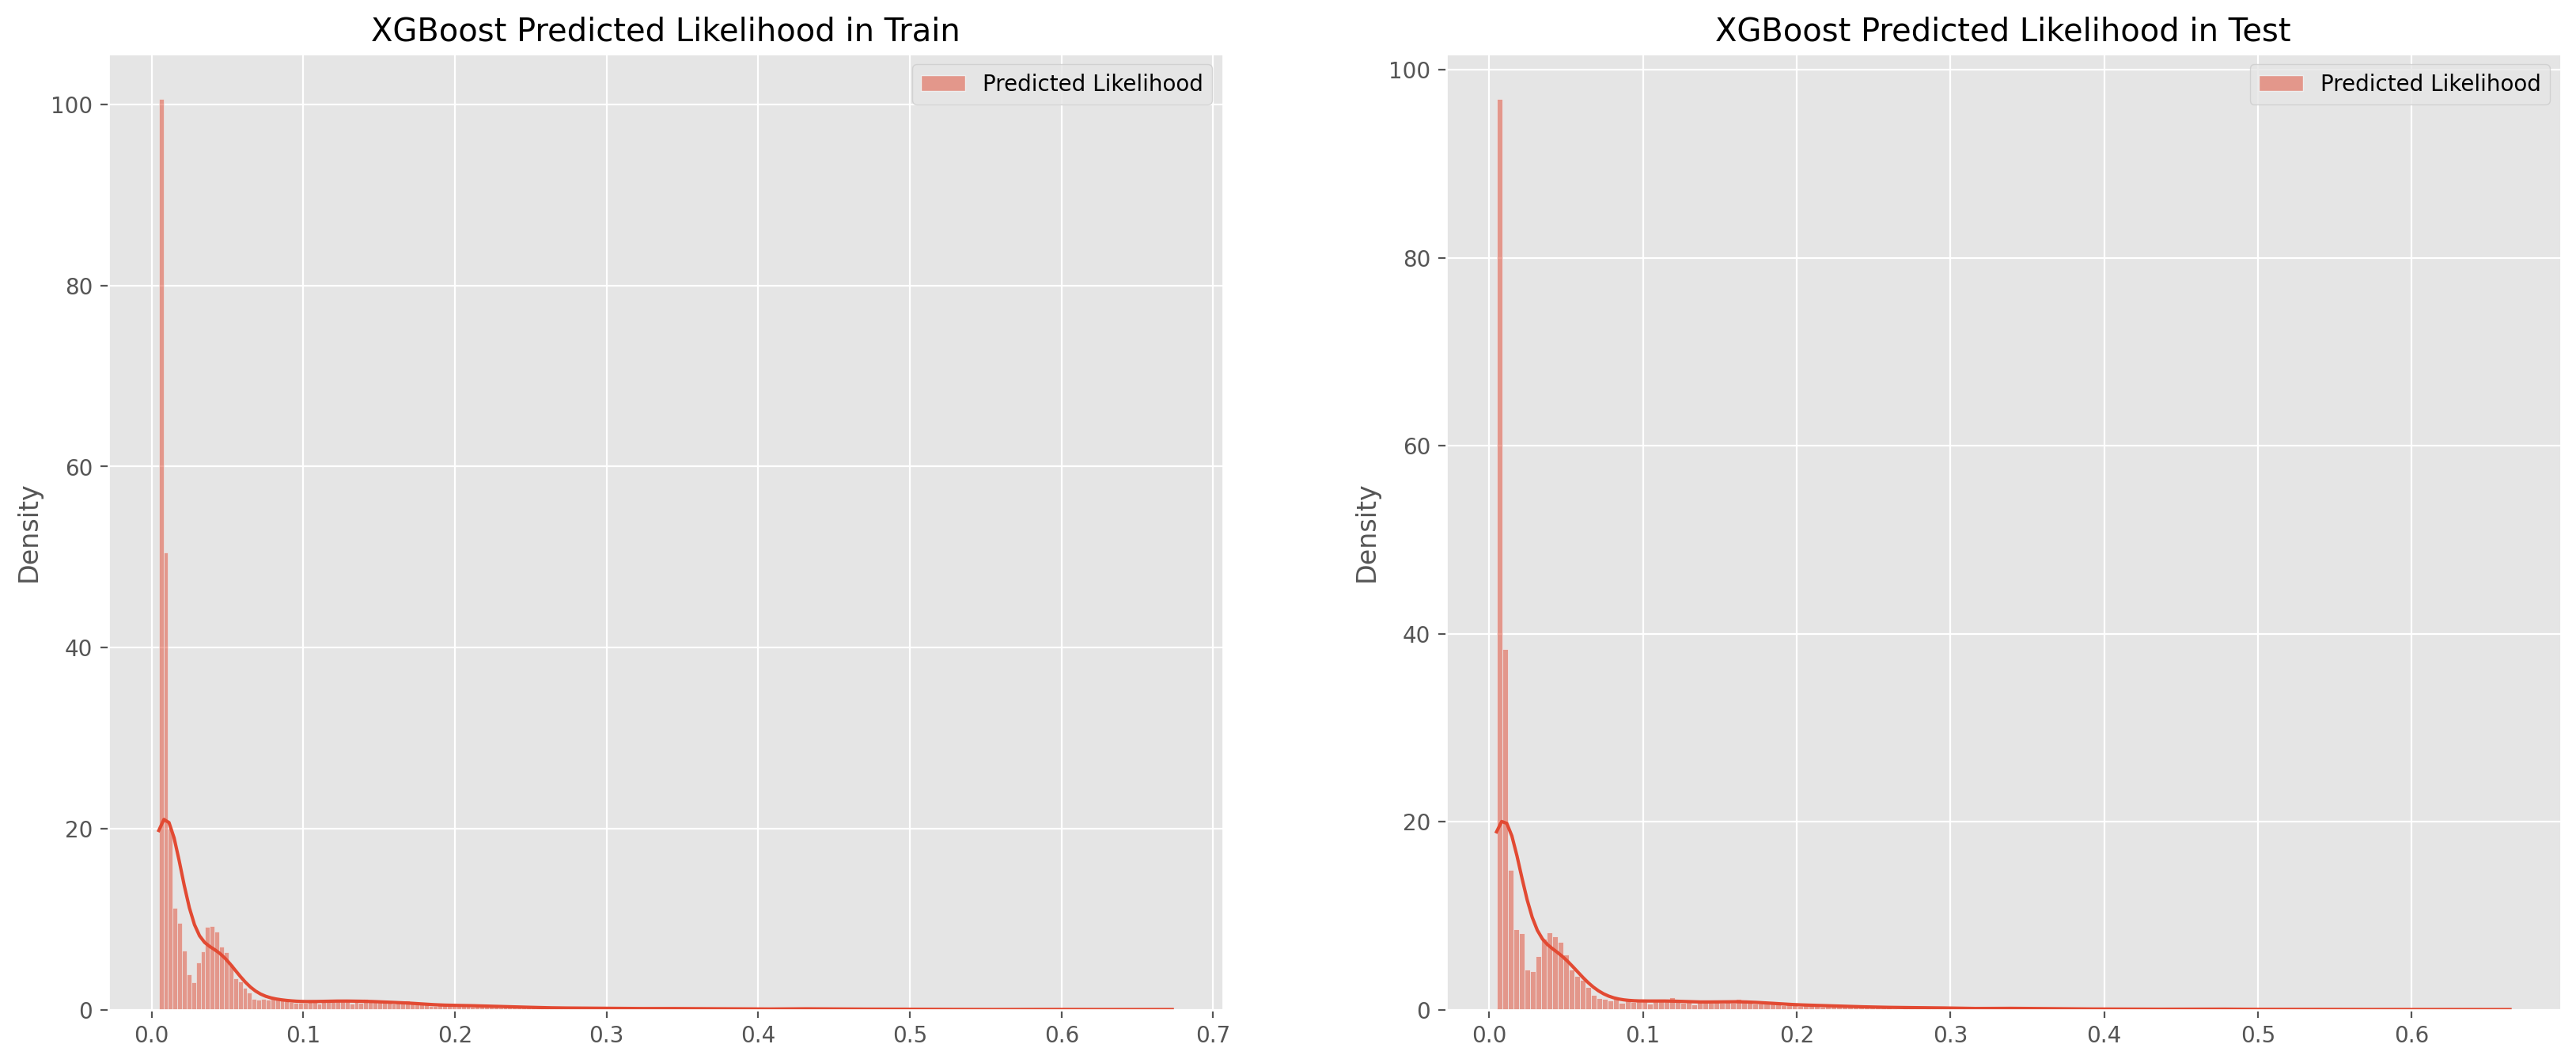

In [38]:
XGB_preds_train = train_preds['stroke_pred']
XGB_preds_test = pd.DataFrame(preds).apply(np.mean, axis = 0)

data1 = pd.DataFrame({'Predicted Likelihood': XGB_preds_train})
data2 = pd.DataFrame({'Predicted Likelihood': XGB_preds_test})

fig, axes = plt.subplots(1, 2, figsize = (20, 8), dpi = 200)
sns.histplot(data = data1, kde = True, stat = 'density', ax = axes[0]).set(title = 'XGBoost Predicted Likelihood in Train')
sns.histplot(data = data2, kde = True, stat = 'density', ax = axes[1]).set(title = 'XGBoost Predicted Likelihood in Test')
plt.show();

In [39]:
submission['stroke'] = XGB_preds_test
submission.to_csv('XGB_submission.csv', index = False)

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">LightGBM Modeling</h1> 

In [40]:
train_lgb = train.copy()
test_lgb = test.copy()

## Defining inputs and target
train_dummies = pd.get_dummies(train_lgb[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
train_dummies = train_dummies.drop(columns = ['gender_Other', 'ever_married_No', 'work_type_children', 'Residence_type_Urban', 'smoking_status_Unknown'])

X = train_lgb.drop(columns = ['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'], axis = 1)
X = pd.concat([X, train_dummies], axis = 1)
Y = train_lgb['stroke']

test_dummies = pd.get_dummies(test_lgb[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
test_dummies = test_dummies.drop(columns = ['gender_Other', 'ever_married_No', 'work_type_children', 'Residence_type_Urban', 'smoking_status_Unknown'])

test_lgb = test_lgb.drop(columns = ['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1)
test_lgb = pd.concat([test_lgb, test_dummies], axis = 1)

cv_scores, roc_auc_scores = list(), list()
preds = list()

## Running 5 times CV
for i in range(5):
    
    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(X, Y):
        
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
    
        ## Building RF model
        lgb_md = LGBMClassifier(n_estimators = 1000,
                                max_depth = 7,
                                learning_rate = 0.01,
                                num_leaves = 20,
                                lambda_l1 = 3,
                                lambda_l2 = 3,
                                bagging_fraction = 0.7,
                                feature_fraction = 0.7).fit(X_train, Y_train)
        
        ## Predicting on X_test and test
        lgb_pred_1 = lgb_md.predict_proba(X_test)[:, 1]
        lgb_pred_2 = lgb_md.predict_proba(test_lgb)[:, 1]
        
        ## Computing roc-auc score
        roc_auc_scores.append(roc_auc_score(Y_test, lgb_pred_1))
        preds.append(lgb_pred_2)
        
    cv_scores.append(np.mean(roc_auc_scores))

lgb_cv_score = np.mean(cv_scores)    
print('The roc-auc score over 5-folds (run 5 times) is:', lgb_cv_score)

[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] 

In [41]:
## Building model in the entire train dataset
lgb_md = LGBMClassifier(n_estimators = 1000,
                        max_depth = 7,
                        learning_rate = 0.01,
                        num_leaves = 20,
                        lambda_l1 = 3,
                        lambda_l2 = 3,
                        bagging_fraction = 0.7,
                        feature_fraction = 0.7).fit(X, Y)

train_preds = pd.DataFrame({'stroke': Y, 'stroke_pred': lgb_md.predict_proba(X)[:, 1]})
train_preds.head()

[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


,stroke,stroke_pred
0,0,0.001491
1,0,0.005081
2,0,0.010087
3,0,0.014281
4,0,0.001014


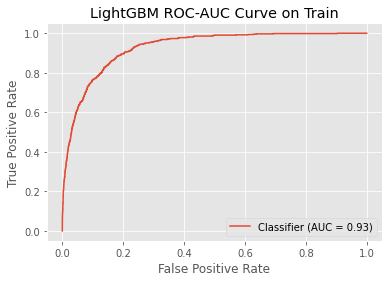

In [42]:
RocCurveDisplay.from_predictions(train_preds['stroke'], train_preds['stroke_pred'])
plt.title('LightGBM ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

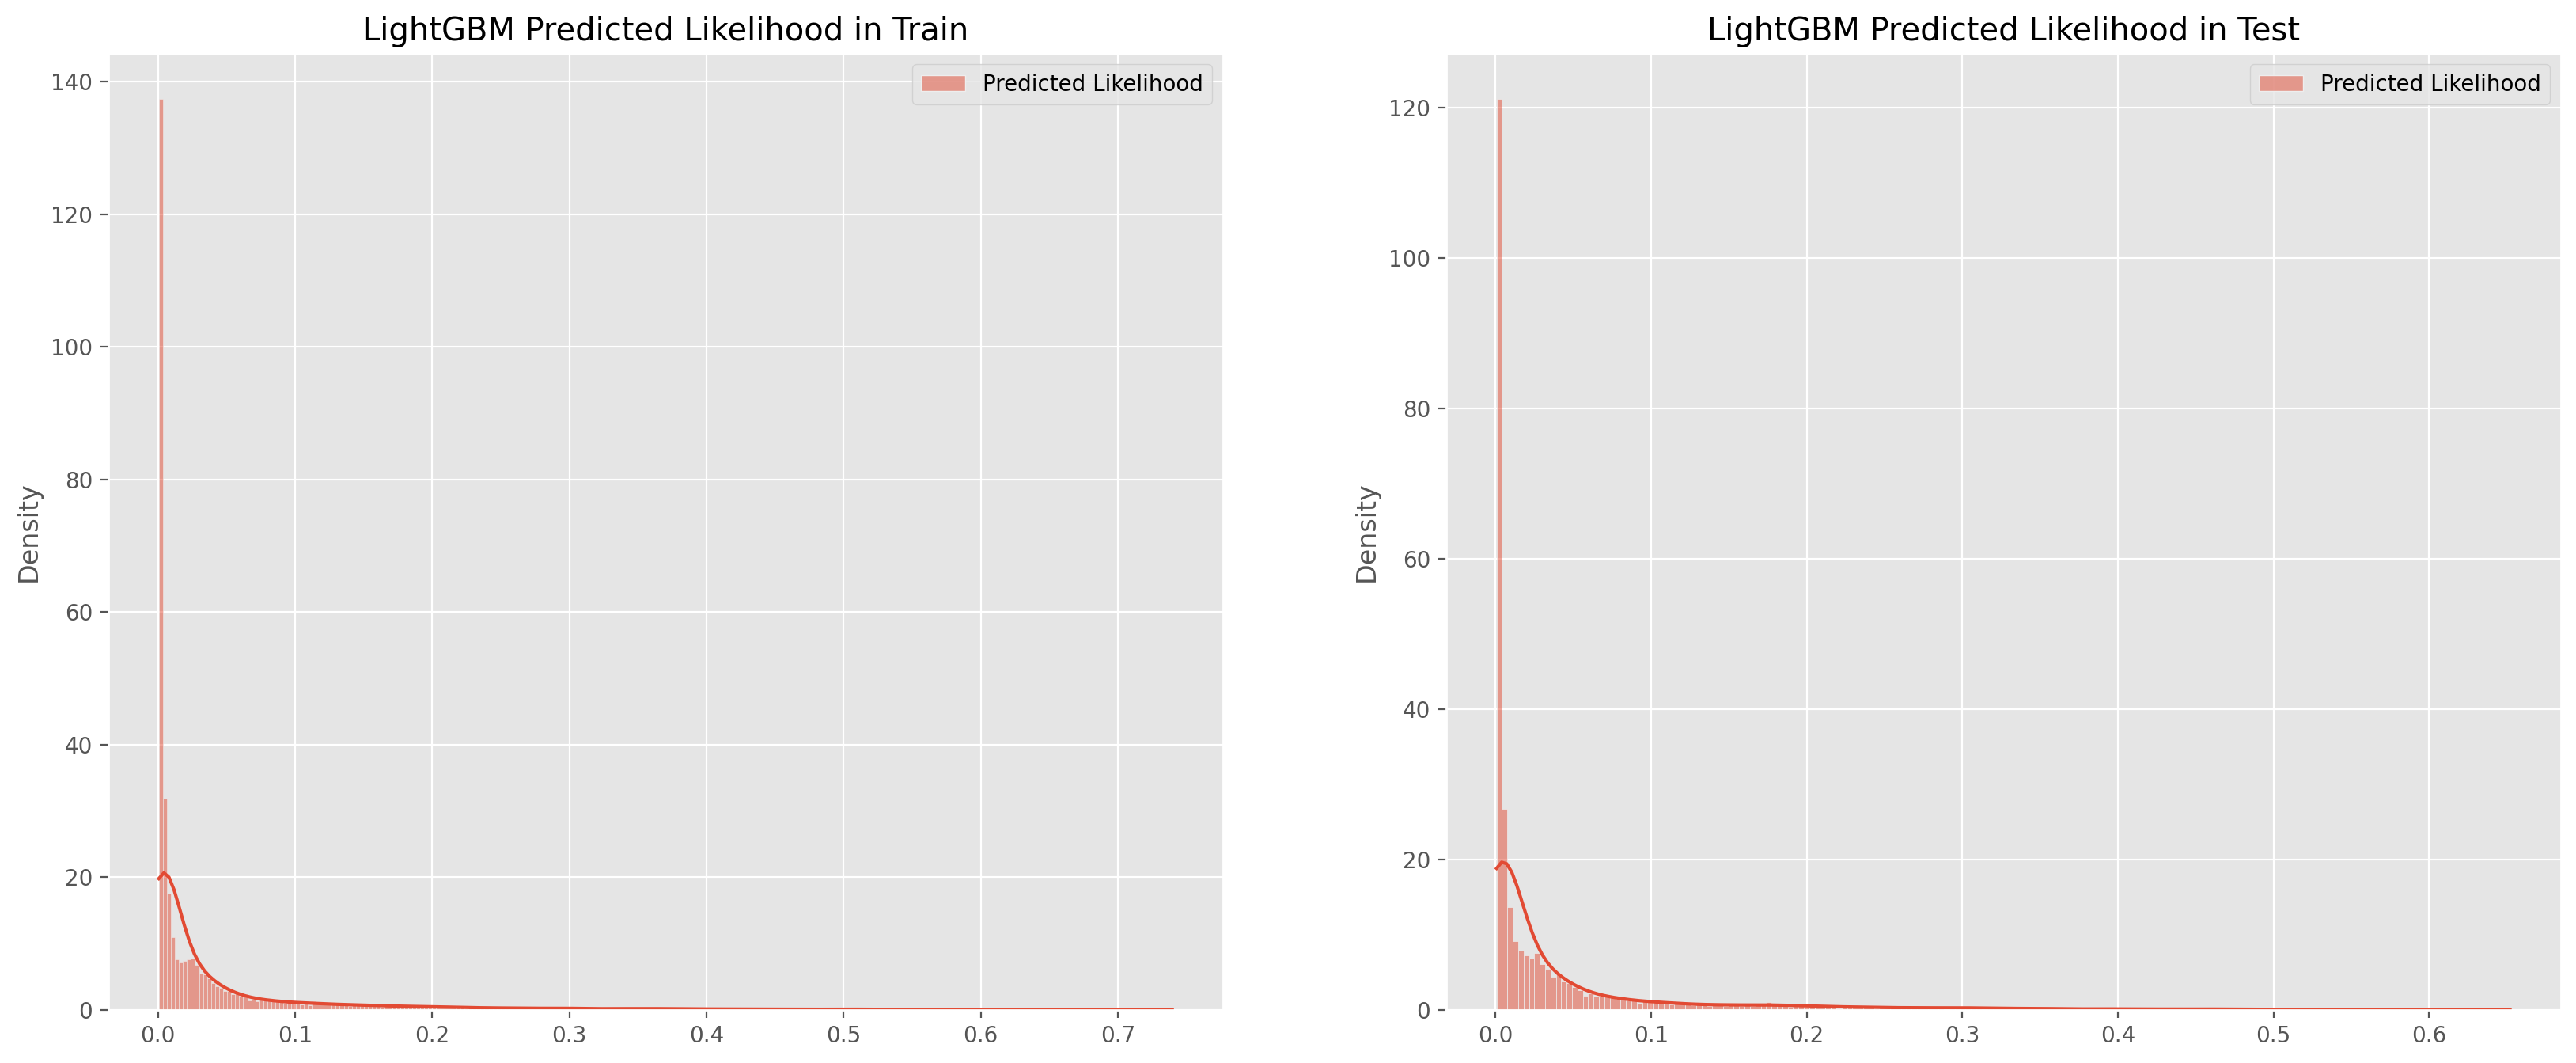

In [43]:
lgb_preds_train = train_preds['stroke_pred']
lgb_preds_test = pd.DataFrame(preds).apply(np.mean, axis = 0)

data1 = pd.DataFrame({'Predicted Likelihood': lgb_preds_train})
data2 = pd.DataFrame({'Predicted Likelihood': lgb_preds_test})

fig, axes = plt.subplots(1, 2, figsize = (20, 8), dpi = 200)
sns.histplot(data = data1, kde = True, stat = 'density', ax = axes[0]).set(title = 'LightGBM Predicted Likelihood in Train')
sns.histplot(data = data2, kde = True, stat = 'density', ax = axes[1]).set(title = 'LightGBM Predicted Likelihood in Test')
plt.show();

In [44]:
submission['stroke'] = lgb_preds_test
submission.to_csv('LightGBM_submission.csv', index = False)

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">CatBoost Modeling</h1> 

In [45]:
train_lgb = train.copy()
test_lgb = test.copy()

## Defining inputs and target
train_dummies = pd.get_dummies(train_lgb[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
train_dummies = train_dummies.drop(columns = ['gender_Other', 'ever_married_No', 'work_type_children', 'Residence_type_Urban', 'smoking_status_Unknown'])

X = train_lgb.drop(columns = ['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'], axis = 1)
X = pd.concat([X, train_dummies], axis = 1)
Y = train_lgb['stroke']

test_dummies = pd.get_dummies(test_lgb[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
test_dummies = test_dummies.drop(columns = ['gender_Other', 'ever_married_No', 'work_type_children', 'Residence_type_Urban', 'smoking_status_Unknown'])

test_lgb = test_lgb.drop(columns = ['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1)
test_lgb = pd.concat([test_lgb, test_dummies], axis = 1)

cv_scores, roc_auc_scores = list(), list()
preds = list()

## Running 5 times CV
for i in range(5):
    
    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(X, Y):
        
        ## Splitting the data 
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
                
        ## Building the CatBoost model
        cat_md = CatBoostClassifier(iterations = 1000, 
                                    depth = 7,
                                    learning_rate = 0.01,
                                    rsm = 0.5,
                                    subsample = 0.931,
                                    l2_leaf_reg = 69,
                                    min_data_in_leaf = 20,
                                    random_strength = 0.175,
                                    random_seed = 836,
                                    task_type = 'CPU',
                                    bootstrap_type = 'Bernoulli',
                                    grow_policy = 'SymmetricTree',
                                    loss_function = 'Logloss',
                                    verbose = False).fit(X_train, Y_train)
            
        ## Predicting on X_test and test
        cat_pred_1 = cat_md.predict_proba(X_test)[:, 1]
        cat_pred_2 = cat_md.predict_proba(test_lgb)[:, 1]
        
        ## Computing roc-auc score
        roc_auc_scores.append(roc_auc_score(Y_test, cat_pred_1))
        preds.append(cat_pred_2)
        
    cv_scores.append(np.mean(roc_auc_scores))

cat_cv_score = np.mean(cv_scores)    
print('The roc-auc score over 5-folds (run 5 times) is:', cat_cv_score)

The roc-auc score over 5-folds (run 5 times) is: 0.8855446011389068


In [46]:
## Building model in the entire train dataset
cat_md = CatBoostClassifier(iterations = 1000,
                            depth = 7,
                            learning_rate = 0.01,
                            rsm = 0.5,
                            subsample = 0.931,
                            l2_leaf_reg = 69,
                            min_data_in_leaf = 20,
                            random_strength = 0.175,
                            random_seed = 836,
                            task_type = 'CPU',
                            bootstrap_type = 'Bernoulli',
                            grow_policy = 'SymmetricTree',
                            loss_function = 'Logloss',
                            verbose = False).fit(X, Y)
                  

train_preds = pd.DataFrame({'stroke': Y, 'stroke_pred': cat_md.predict_proba(X)[:, 1]})
train_preds.head()

,stroke,stroke_pred
0,0,0.004012
1,0,0.005834
2,0,0.007278
3,0,0.027744
4,0,0.002577


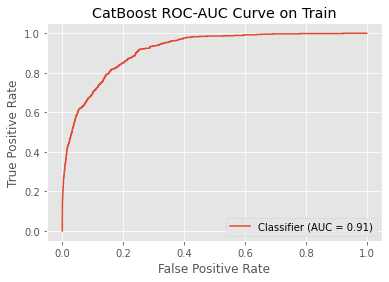

In [47]:
RocCurveDisplay.from_predictions(train_preds['stroke'], train_preds['stroke_pred'])
plt.title('CatBoost ROC-AUC Curve on Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

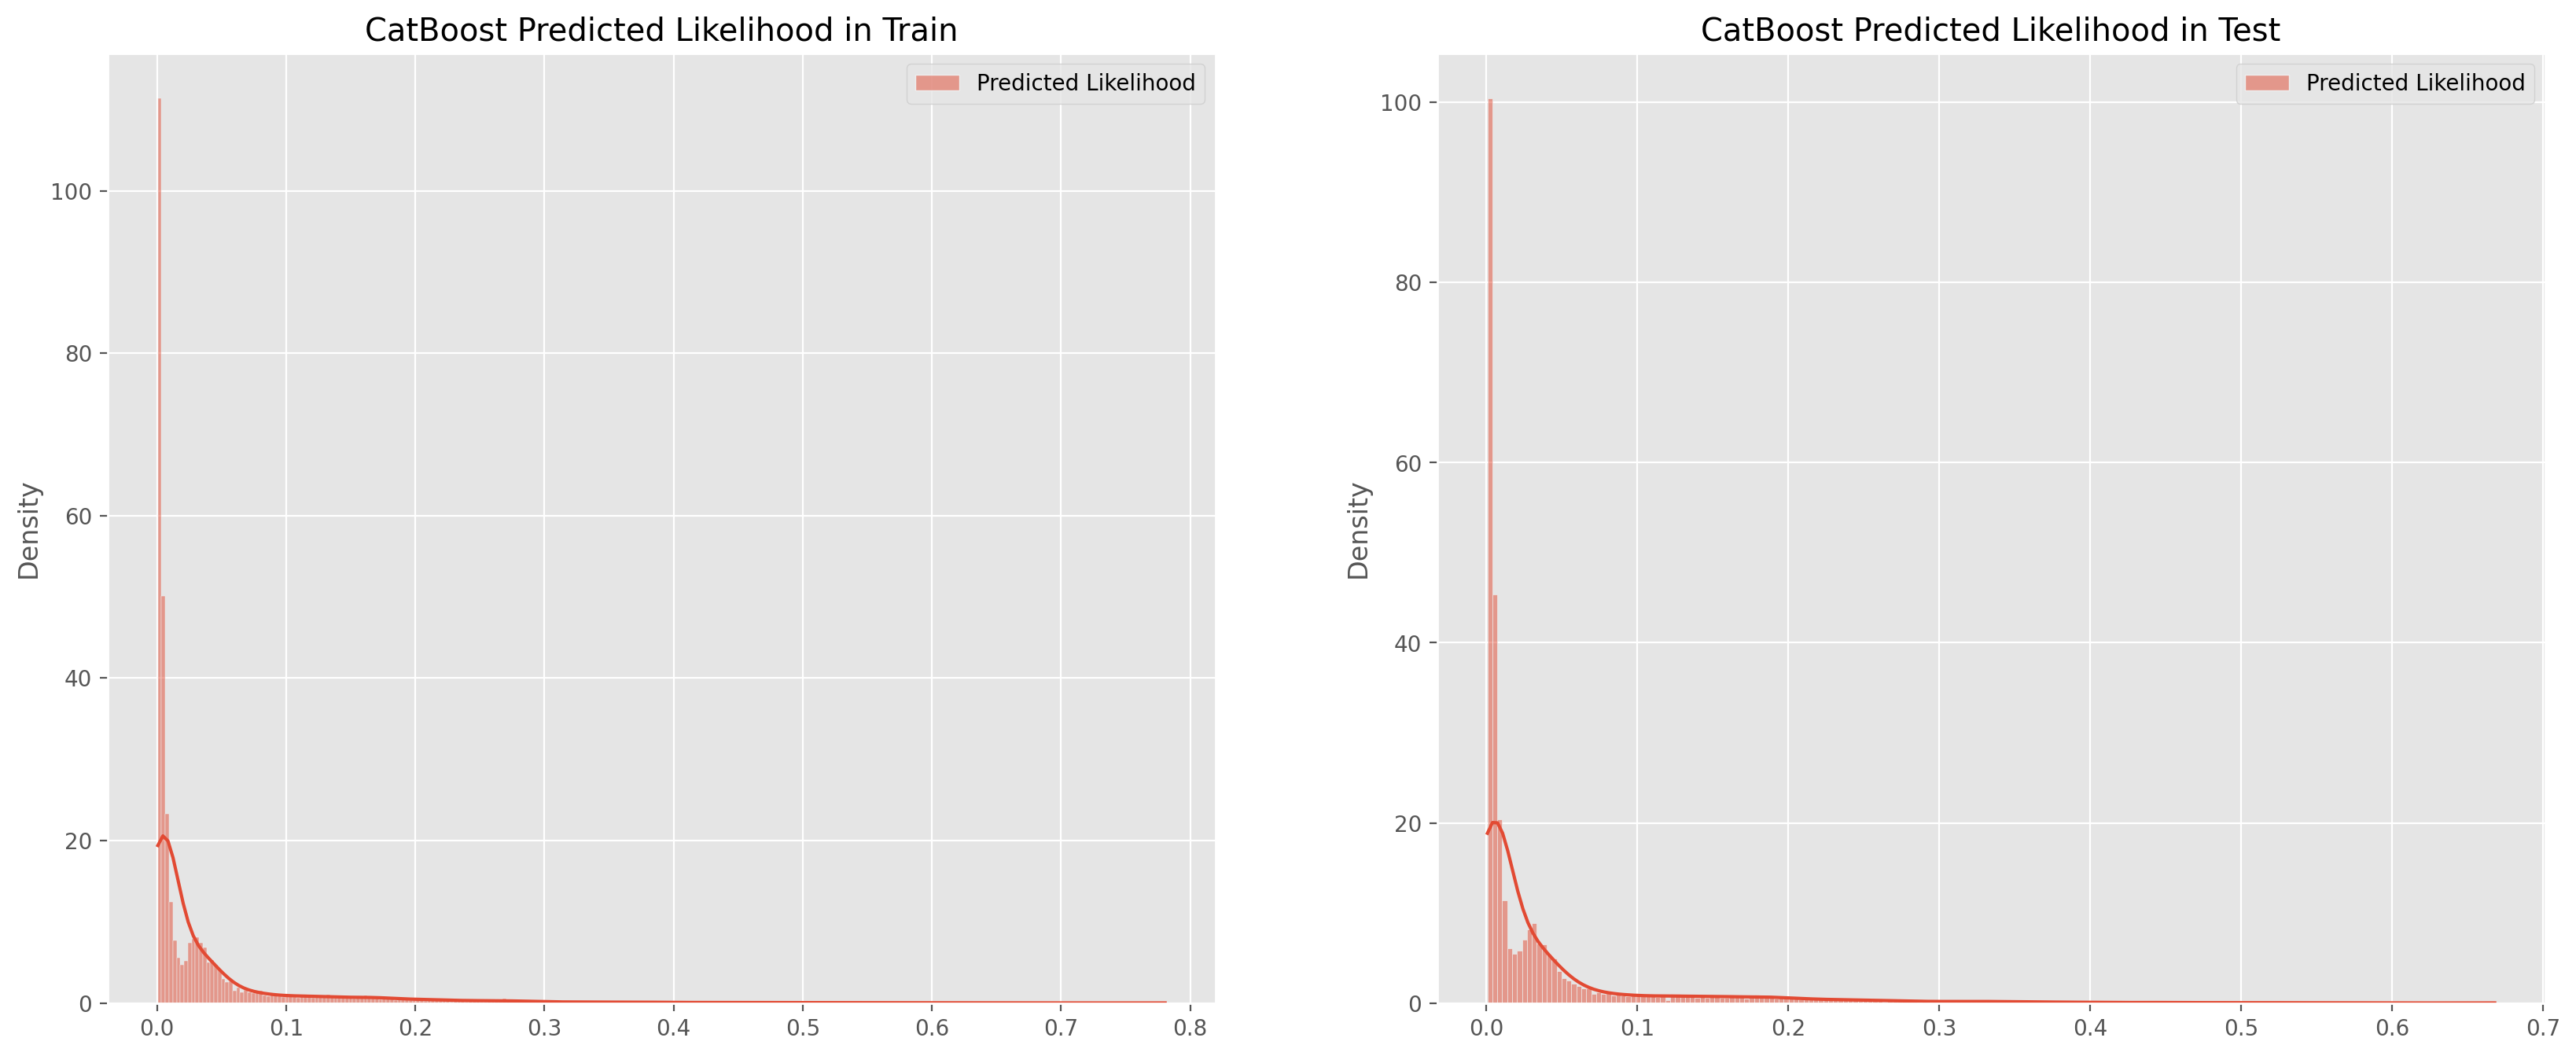

In [48]:
cat_preds_train = train_preds['stroke_pred']
cat_preds_test = pd.DataFrame(preds).apply(np.mean, axis = 0)

data1 = pd.DataFrame({'Predicted Likelihood': cat_preds_train})
data2 = pd.DataFrame({'Predicted Likelihood': cat_preds_test})

fig, axes = plt.subplots(1, 2, figsize = (20, 8), dpi = 200)
sns.histplot(data = data1, kde = True, stat = 'density', ax = axes[0]).set(title = 'CatBoost Predicted Likelihood in Train')
sns.histplot(data = data2, kde = True, stat = 'density', ax = axes[1]).set(title = 'CatBoost Predicted Likelihood in Test')
plt.show();

In [49]:
submission['stroke'] = cat_preds_test
submission.to_csv('CatBoost_submission.csv', index = False)

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Ensemble Learning</h1> 

In [50]:
wtot = logit_cv_score + svm_cv_score + RF_cv_score + XGB_cv_score + lgb_cv_score + cat_cv_score
w1 = logit_cv_score / wtot
w2 = svm_cv_score / wtot
w3 = RF_cv_score / wtot
w4 = XGB_cv_score / wtot
w5 = lgb_cv_score / wtot
w6 = cat_cv_score / wtot

ensemble_pred = w1*logit_preds_test + w2*svm_preds_test + w3*RF_preds_test + w4*XGB_preds_test + w5*lgb_preds_test + w6*cat_preds_test

submission['stroke'] = ensemble_pred
submission.head()

,id,stroke
0,15304,0.039169
1,15305,0.175794
2,15306,0.004751
3,15307,0.059937
4,15308,0.016474


In [51]:
submission.to_csv('ensemble_submission.csv', index = False)